In [2]:
import json
import numpy as np

with open("/data/dacon_cars/data/annotations/train.json", "r") as f:
    json_data = json.load(f)

bbox_width_weight_class = np.array(
    list(
        map(
            lambda x: [x["bbox"][2], x["bbox"][3], x["category_id"]],
            json_data["annotations"],
        )
    )
)

In [91]:
bbox_width_weight_class

array([[275, 239,  10],
       [323, 358,  26],
       [253, 261,  13],
       ...,
       [290, 288,   6],
       [294, 326,  20],
       [229, 280,  25]])

In [92]:
# np.where(bbox_width_weight_class.T[0] > 360)
np.where(bbox_width_weight_class.T[0] > bbox_width_weight_class.T[1])

(array([    0,     4,     8, ..., 16993, 16994, 16997]),)

In [93]:
np.where(bbox_width_weight_class.T[1] > 441)

(array([], dtype=int64),)

In [94]:
bbox_width_weight_class[10461]

array([321, 441,  12])

In [9]:
bbox_width_weight_class[0, 0]

275

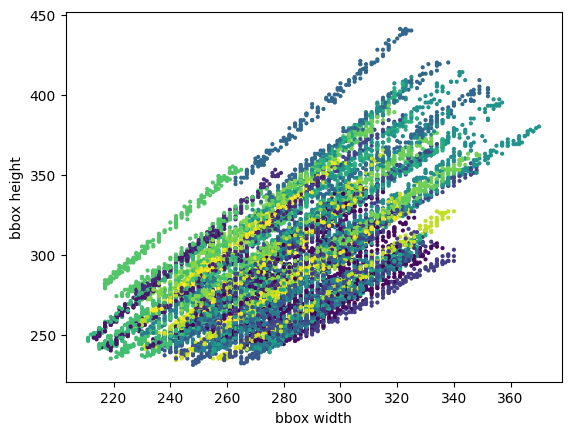

In [26]:
import matplotlib.pyplot as plt
import random


def generate_random_hex():
    # 6자리 랜덤 hex 값 생성
    hex_value = "".join(random.choice("0123456789ABCDEF") for _ in range(6))
    return hex_value


# plt.clf()
# plt.figure(figsize=(15, 15))
# plt.xlim(bbox_width_weight_class[:, 0].min(), bbox_width_weight_class[:, 0].max())
# plt.ylim(bbox_width_weight_class[:, 1].min(), bbox_width_weight_class[:, 1].max())
# for i in range(34):
#     color = f"#{generate_random_hex()}"
#     for j in range(500):
#         plt.text(
#             bbox_width_weight_class[i * 500 + j, 0],
#             bbox_width_weight_class[i * 500 + j, 1],
#             str(i),
#             color=color,
#             fontdict={"size": 9},
#         )
#     break
plt.scatter(
    bbox_width_weight_class.T[0],
    bbox_width_weight_class.T[1],
    s=4,
    c=bbox_width_weight_class.T[2],
)
plt.xlabel("bbox width")
plt.ylabel("bbox height")
plt.show()

[211. 280. 370.]


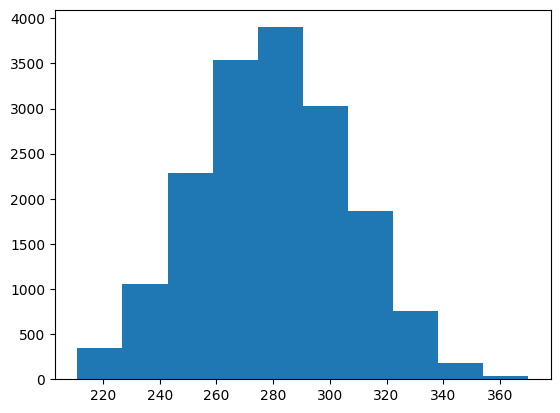

[231. 291. 441.]


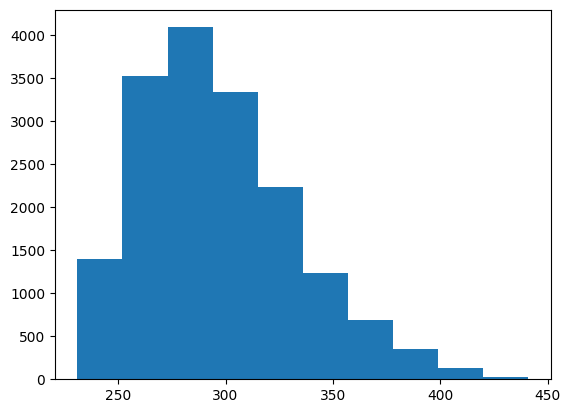

In [97]:
plt.hist(bbox_width_weight_class.T[0])
print(np.percentile(bbox_width_weight_class.T[0], q=[0, 50, 100]))
plt.show()
plt.hist(bbox_width_weight_class.T[1])
print(np.percentile(bbox_width_weight_class.T[1], q=[0, 50, 100]))
plt.show()

In [8]:
import numpy as np
from glob import glob
import cv2

car_list = sorted(glob("/data/dacon_cars/data/test_cars_image/*.png"))

size_list = []
for path in car_list:
    img = cv2.imread(path)
    size_list.append([img.shape[1], img.shape[0]])

len(size_list)

4274

In [311]:
import matplotlib.pyplot as plt

# img = cv2.imread('/data/dacon_cars/data/test_cars/064442001_0.png')
size_array = np.array(size_list)

over_width = np.where((size_array.T[0] < 215) & (size_array.T[0] > 210))  # 215!
print(over_width)

over_height = np.where((size_array.T[1] < 100))  # & (size_array.T[1] < 410)
print(over_height)

(array([ 556, 1386, 2480, 2934]),)
(array([ 335,  801,  826, 1073, 1287, 1350, 1361, 1386, 1447, 1526, 1598,
       1925, 2032, 2093, 2301, 2355, 2394, 2636, 2850, 2865, 2934, 2937,
       3229, 3252, 3358, 3388, 3457, 3506, 3923, 3969, 4006, 4064, 4072,
       4206, 4213]),)


In [312]:
i = 0

/data/dacon_cars/data/test_cars_image/113824007_1.png
(85, 202)


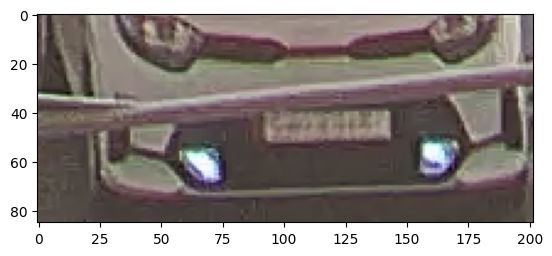

In [335]:
index = over_height[0][i]

i -= 1
print(car_list[index])
img = cv2.imread(car_list[index])
print(img.shape[:2])
plt.imshow(img)

[[299 320]
 [278 308]
 [197 191]
 ...
 [270 264]
 [240 115]
 [279 324]]


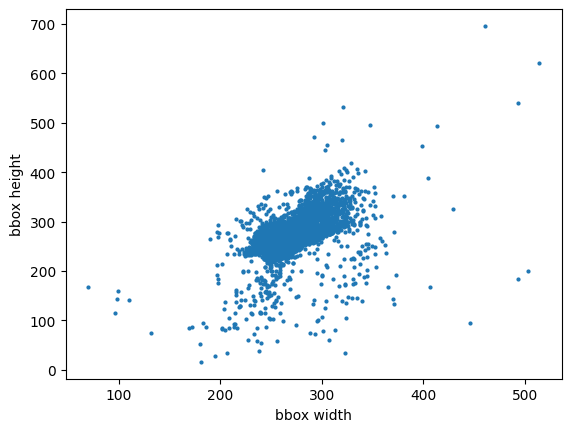

In [11]:
import numpy as np
import matplotlib.pyplot as plt

size_array = np.array(size_list)
print(size_array)
plt.scatter(
    size_array.T[0],
    size_array.T[1],
    s=4,
)
plt.xlabel("bbox width")
plt.ylabel("bbox height")
plt.show()

In [154]:
import os

test_paths = os.listdir("/data/dacon_cars/data/test")

test_cars_path = os.listdir("/data/dacon_cars/data/test_cars")
for path in test_paths:
    if path.replace(".png", "_0.png") not in test_cars_path:
        print(path)

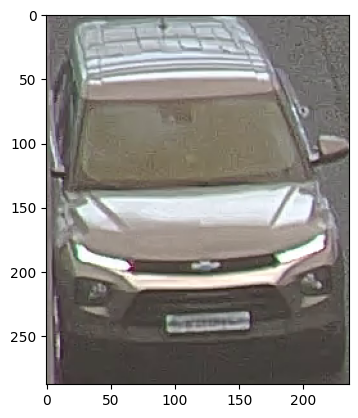

In [34]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/data/dacon_cars/data/test_cars/081946762_0.png")
img = img[5:-5, 5:-5]
plt.imshow(img)